# <center>Predicting The Temperature Parameters of Blast Furnace Using Machine Learning & Deep Learning</center>
---
# <center>REGRESSION ANALYSIS USING ML ALGORITHMS</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('modified_bf_data.csv',index_col=[0])
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,SAT_1,SAT_2,SAT_3,SAT_4
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,121.0,2.0,22.22,21.00,3.88,69.940478,73.583364,77.713731,82.332439,85.074844
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,125.0,1.0,22.56,21.00,3.94,71.454476,74.666066,77.198904,82.604995,84.877672
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,124.0,1.0,22.49,21.08,3.94,70.579462,74.837214,78.518159,84.475989,83.397999
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,115.0,1.0,22.36,21.13,3.99,70.179791,75.008361,80.865417,84.880888,83.368013
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,125.0,1.0,22.25,21.30,4.10,70.728470,75.799102,82.564532,84.282448,84.592822


In [3]:
df.shape

(26471, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26471 entries, 0 to 26470
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      26471 non-null  object 
 1   CB_FLOW        26471 non-null  float64
 2   CB_PRESS       26471 non-null  float64
 3   CB_TEMP        26471 non-null  float64
 4   STEAM_FLOW     26471 non-null  float64
 5   STEAM_TEMP     26471 non-null  float64
 6   STEAM_PRESS    26471 non-null  float64
 7   O2_PRESS       26471 non-null  float64
 8   O2_FLOW        26471 non-null  float64
 9   O2_PER         26471 non-null  float64
 10  PCI            26471 non-null  float64
 11  ATM_HUMID      26471 non-null  float64
 12  HB_TEMP        26471 non-null  float64
 13  HB_PRESS       26471 non-null  float64
 14  TOP_PRESS      26471 non-null  float64
 15  TOP_TEMP1      26471 non-null  float64
 16  TOP_TEMP2      26471 non-null  float64
 17  TOP_TEMP3      26471 non-null  float64
 18  TOP_TE

In [5]:
df.isnull().sum()

DATE_TIME        0
CB_FLOW          0
CB_PRESS         0
CB_TEMP          0
STEAM_FLOW       0
STEAM_TEMP       0
STEAM_PRESS      0
O2_PRESS         0
O2_FLOW          0
O2_PER           0
PCI              0
ATM_HUMID        0
HB_TEMP          0
HB_PRESS         0
TOP_PRESS        0
TOP_TEMP1        0
TOP_TEMP2        0
TOP_TEMP3        0
TOP_TEMP4        0
TOP_SPRAY        0
TOP_TEMP         0
TOP_PRESS_1      0
CO               0
CO2              0
H2               0
SKIN_TEMP_AVG    0
SAT_1            0
SAT_2            0
SAT_3            0
SAT_4            0
dtype: int64

<AxesSubplot:>

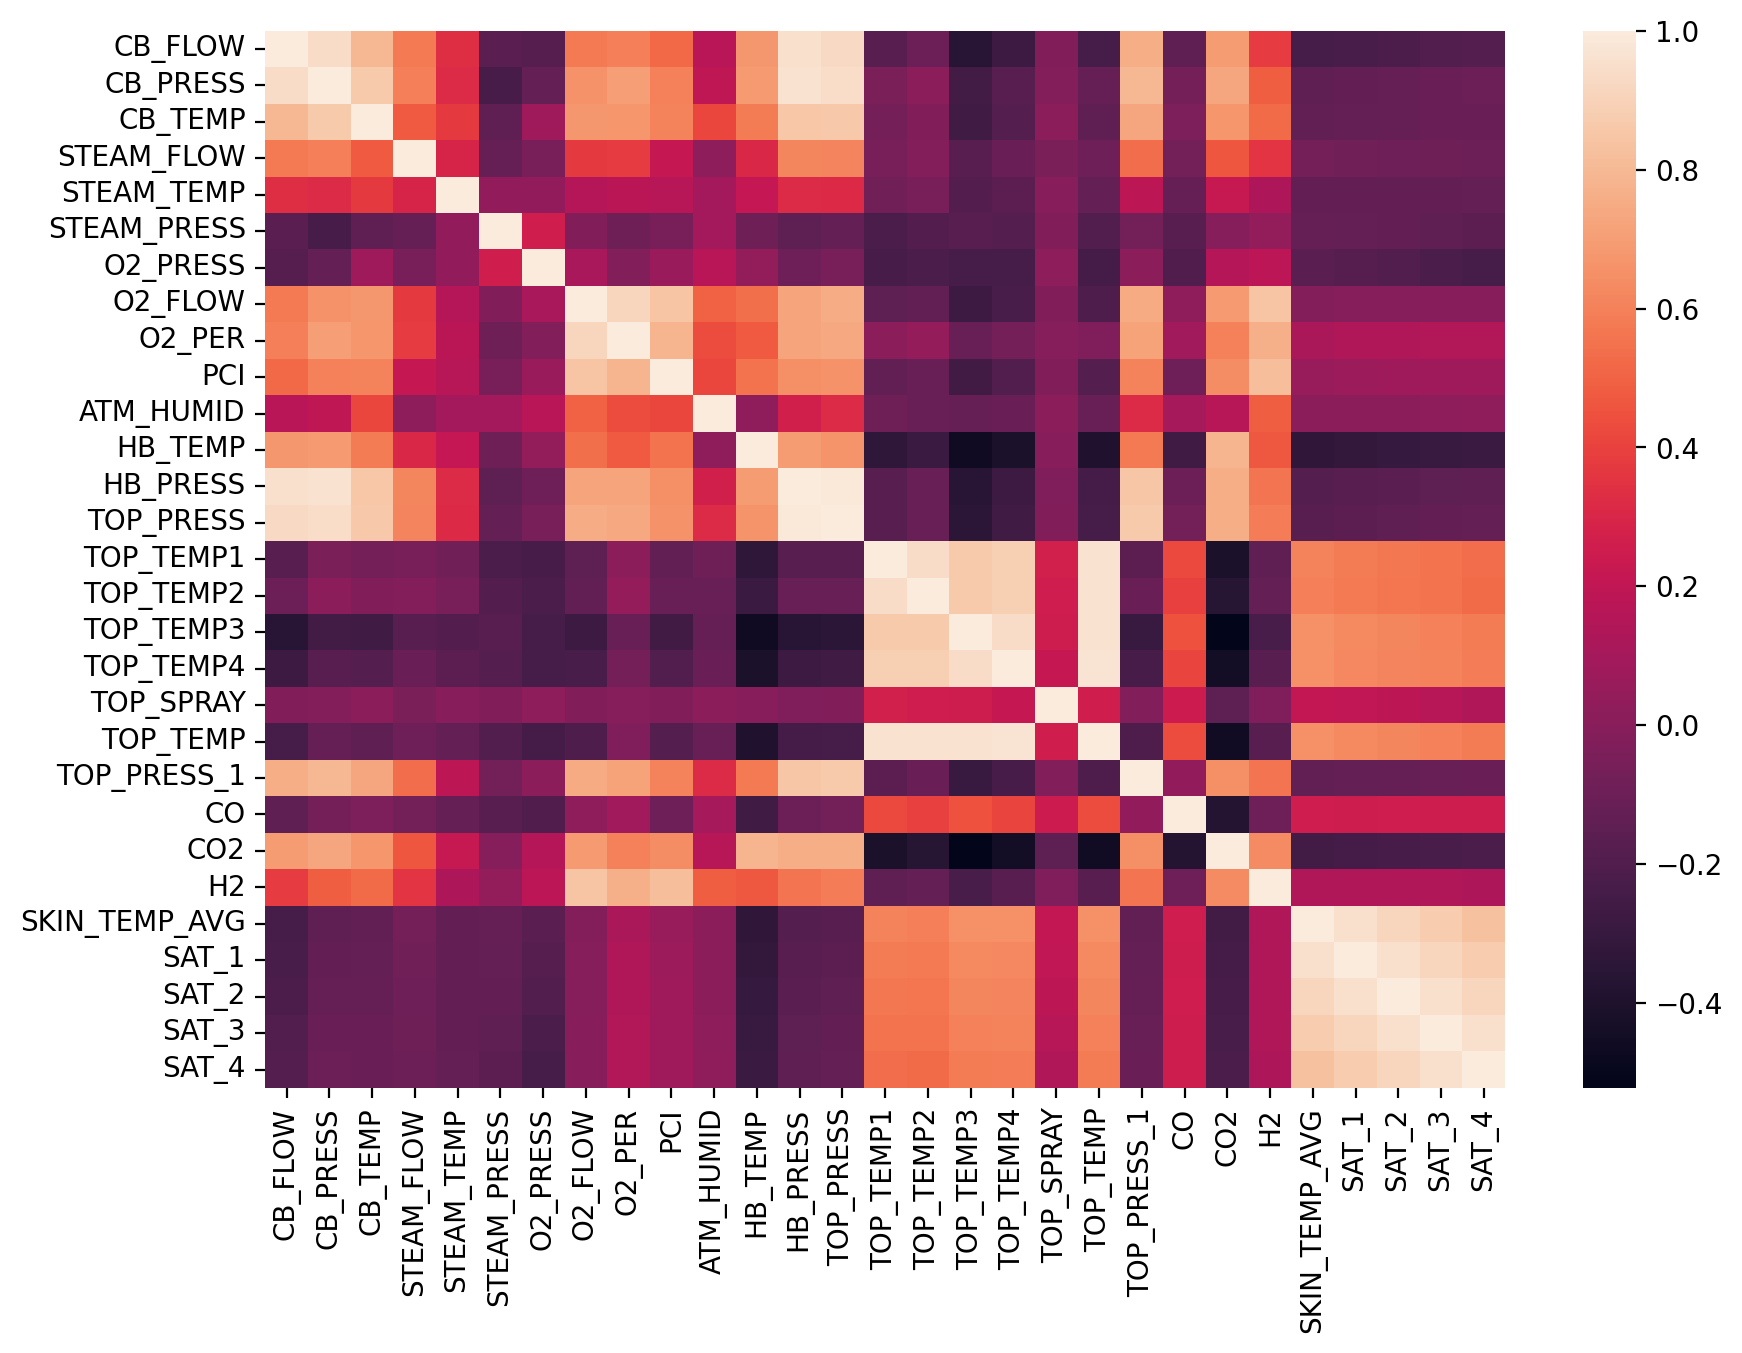

In [6]:
plt.figure(figsize=(10,7),dpi=200)
sns.heatmap(df.corr())

### MULTIPLE LINEAR REGRESSION

In [7]:
X = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
X.drop('DATE_TIME',axis=1,inplace=True)
y = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(f"The Model Accuracy is : {round(r2_score(y_test, preds)*100,2)}%")

The Model Accuracy is : 81.43%


In [11]:
X = scaler.fit_transform(X)
model.fit(X,y)
joblib.dump(model, 'mlr_model.pkl')

['mlr_model.pkl']

### MULTIPLE LINEAR REGRESSION (WITH PCA)

In [12]:
X = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
X.drop('DATE_TIME',axis=1,inplace=True)
y = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(f"The Model Accuracy is : {round(r2_score(y_test, preds)*100,2)}%")

The Model Accuracy is : 81.38%


### RANDOM FOREST REGRESSION

In [17]:
X = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
X.drop('DATE_TIME',axis=1,inplace=True)
y = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
RF_reg = RandomForestRegressor(n_estimators=400, max_depth=100, random_state=42)
RF_reg.fit(X_train,y_train)
preds = RF_reg.predict(X_test)
print(f"The Model Accuracy is : {round(r2_score(y_test, preds)*100,2)}%")

The Model Accuracy is : 94.84%


In [21]:
RF_reg = RandomForestRegressor(n_estimators=400, max_depth=100, random_state=42)
X = scaler.fit_transform(X)
RF_reg.fit(X,y)
joblib.dump(RF_reg, 'rfr_model.pkl')

['rfr_model.pkl']

# <center>--- End of Notebook ---</center>